<div id="image">
<img src="https://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png" WIDTH=280 HEIGHT=280>
</div>
<div id="subject">
<CENTER>
</br>
<font size="3"></br> Machine Learning TP Clustering </font></br></div>
</CENTER>
<CENTER>
<span style="color:black">Tales Marra - tales.marra@imt-atlantique.net</span>
</CENTER>
</div>


This work has been done in the course of Machine Learning in 2019, at IMT Atlantique: https://www.imt-atlantique.fr

## Partitional clustering and quality of a clustering

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from KMedoids import KMedoids
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import cut_tree
import matplotlib

## Question 1

In [77]:
food = pd.read_csv('food.csv', sep=';')
ruspini = pd.read_csv('ruspini.csv', sep=',')

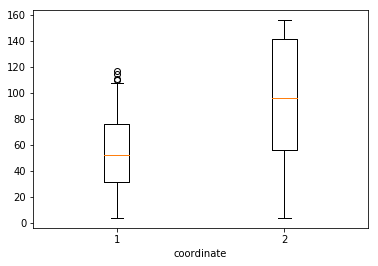

In [159]:
plt.boxplot((ruspini['x'].values,ruspini['y'].values),whis=0.7)
plt.xlabel('coordinate')
plt.show()

Answer: Doing data analysis, it is possible to see that the average for the x coordinate is about 50 and for the y coordinate,
close to 100. We can see that for the y coordinate, a lot of values are under the average, and for the x coordinate,
a lot of values are above average.

## Question 2 

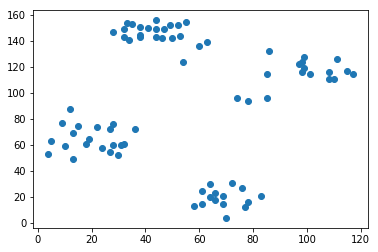

In [14]:
plt.scatter(ruspini['x'].values,ruspini['y'].values)
plt.show()

Answer: We expect to have four clusters.

## Question 3

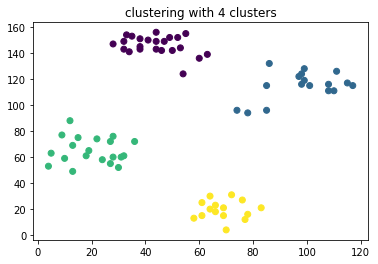

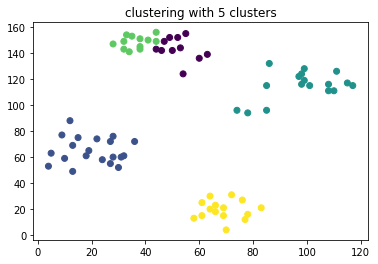

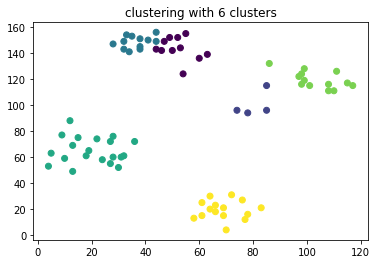

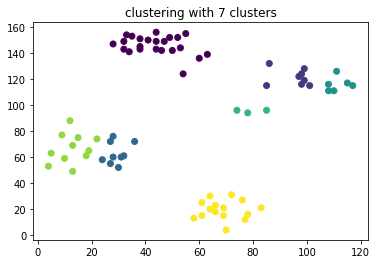

In [81]:
for n in range(4,8):
    kmeans = KMeans(n_clusters=n, init='random')
    ruspini_prediction= kmeans.fit_predict(ruspini)
    plt.figure()
    plt.title('clustering with {} clusters'.format(n))
    plt.scatter(ruspini['x'].values,ruspini['y'].values, c=ruspini_prediction)
    plt.show()

Answer: we note that the cluster's centroids become unstable when increasing the number of clusters. 

## Question 4

For solving this, we set the initial state to its default value (not random).

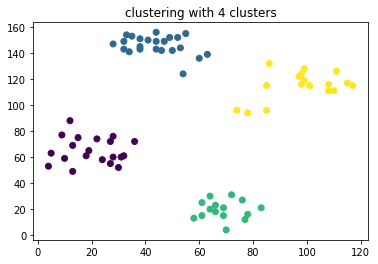

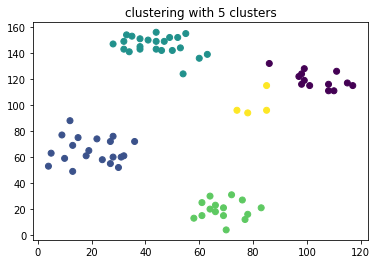

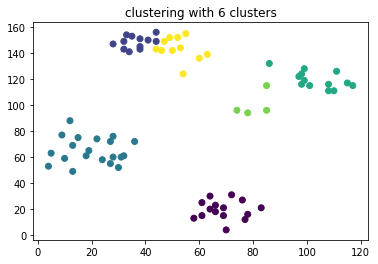

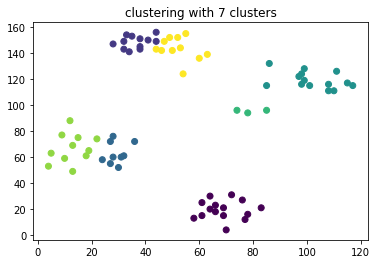

In [84]:
for n in range(4,8):
    kmeans = KMeans(n_clusters=n)
    ruspini_prediction= kmeans.fit_predict(ruspini)
    plt.figure()
    plt.title('clustering with {} clusters'.format(n))
    plt.scatter(ruspini['x'].values,ruspini['y'].values, c=ruspini_prediction)
    plt.show()

We note that its much more stable now.

## Question 5

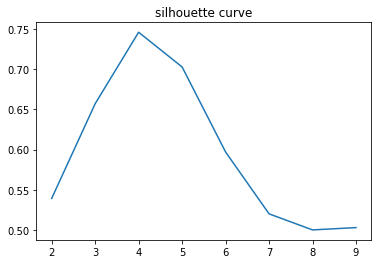

In [30]:
silhouette = list()
for n in range(2,10):
    kmeans = KMeans(n_clusters=n)
    ruspini_prediction= kmeans.fit_predict(ruspini)
    silhouette.append(silhouette_score(ruspini, ruspini_prediction))
    
plt.figure()
plt.title('silhouette curve')
x = range(2,10)
plt.plot(x,silhouette)
plt.show()

In [51]:
def plot_graphs(data, k_medoids,n):
    colors = {0:'b*', 1:'g^',2:'ro',3:'c*', 4:'m^', 5:'yo', 6:'ko', 7:'w*'}
    index = 0
    for key in k_medoids.clusters.keys():
        temp_data = k_medoids.clusters[key]
        x = [data[i][0] for i in temp_data]
        y = [data[i][1] for i in temp_data]
        plt.plot(x, y, colors[index])
        index += 1
    plt.title('Cluster formations for n_clusters={}'.format(n))
    plt.show()

    medoid_data_points = []
    for m in k_medoids.medoids:
        medoid_data_points.append(data[m])   
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    x_ = [i[0] for i in medoid_data_points]
    y_ = [i[1] for i in medoid_data_points]
    plt.plot(x, y, 'yo')
    plt.plot(x_, y_, 'r*')
    plt.title('Mediods are highlighted in red')
    plt.show()


Answer: from the plot, we can see that the optimal number of clusters is 4

## Question 6

using github implementation of PAM in https://github.com/SachinKalsi/kmedoids

In [54]:
result = list()
for row in ruspini.iterrows():
    result.append([row[1]['x'],row[1]['y']])

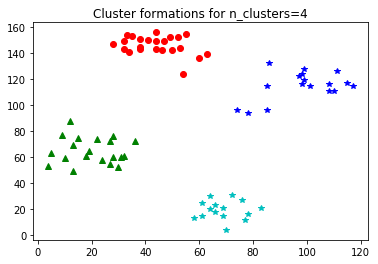

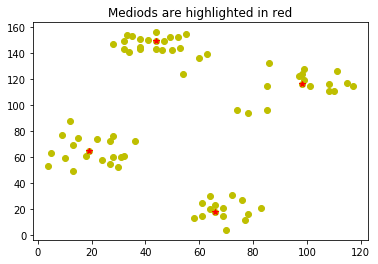

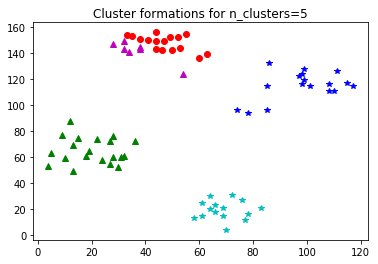

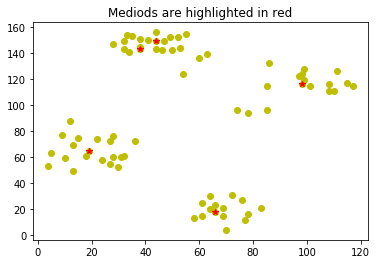

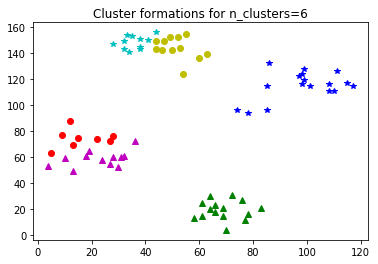

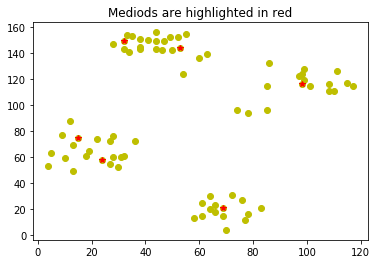

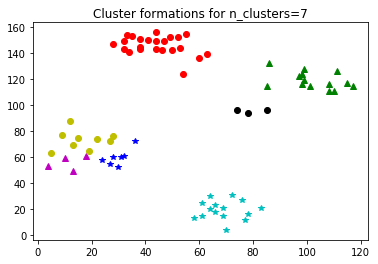

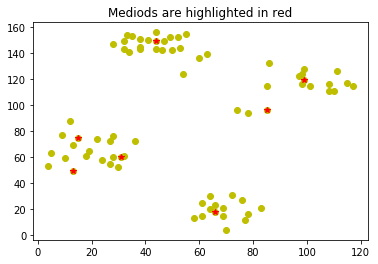

In [53]:
for n in range(4,8):
    k_medoids = KMedoids(n_cluster=n)
    k_medoids.fit(result)
    plot_graphs(result, k_medoids,n)

Answer: the centroids are better positioned and, therefore, the method is more robust.

# Hierarchical clustering

## Question 7

In [70]:
food

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7
5,Broiled chicken,115,20,3,8,1.4
6,Canned chicken,170,25,7,12,1.5
7,Beef heart,160,26,5,14,5.9
8,Roast lamb leg,265,20,20,9,2.6
9,Roast lamb shoulder,300,18,25,9,2.3


In [98]:
for key in food.drop('Name',axis=1).keys():
    array=food[key].values
    mean = np.average(array)
    std = np.std(array)
    array = (array - mean)/std
    food[key] = array

In [99]:
food

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,1.335059,0.239681,1.314297,-0.456581,0.152385
1,Hamburger,0.378515,0.479361,0.318516,-0.456581,0.222121
2,Roast beef,2.140569,-0.958723,2.310078,-0.482699,-0.266028
3,Beefsteak,1.687470,0.000000,1.676399,-0.456581,0.152385
4,Canned beef,-0.275962,0.719042,-0.315163,-0.352109,0.919476
5,Broiled chicken,-0.930439,0.239681,-0.948842,-0.469640,-0.684442
6,Canned chicken,-0.376651,1.438084,-0.586740,-0.417404,-0.614706
7,Beef heart,-0.477340,1.677764,-0.767791,-0.391286,2.453658
8,Roast lamb leg,0.579893,0.239681,0.590093,-0.456581,0.152385
9,Roast lamb shoulder,0.932304,-0.239681,1.042720,-0.456581,-0.056822


In [102]:
tsne = TSNE(n_components=2)
res = tsne.fit_transform(food.drop('Name',axis=1))

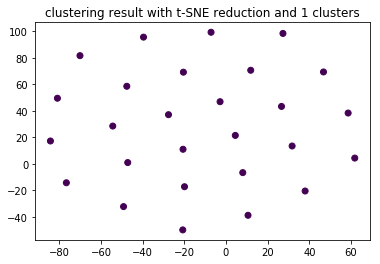

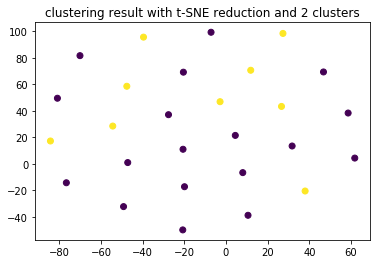

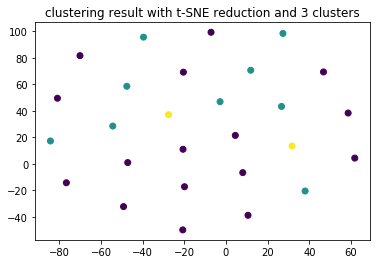

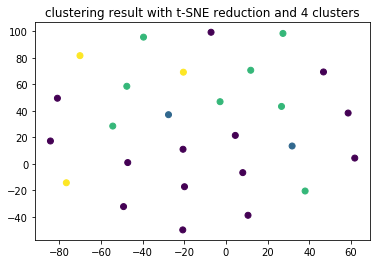

In [103]:
for n in range(1,5):
    kmeans = KMeans(n_clusters=n)
    plt.figure()
    plt.title('clustering result with t-SNE reduction and {} clusters'.format(n))
    food_pred = kmeans.fit_predict(food.drop('Name',axis=1))
    plt.scatter(res[:,0],res[:,1],c=food_pred)
    plt.show()

## Question 8

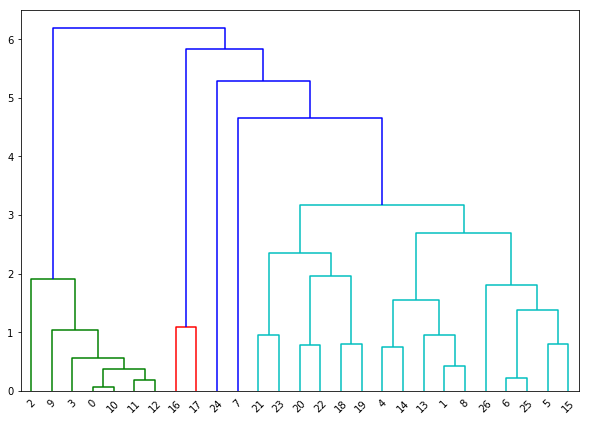

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(food.drop('Name',axis=1), 'complete')


plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Analizing the data, we can see that there are mainly four different classes in terms of the nutrition facts given.

## Question 9

Changing the distances:

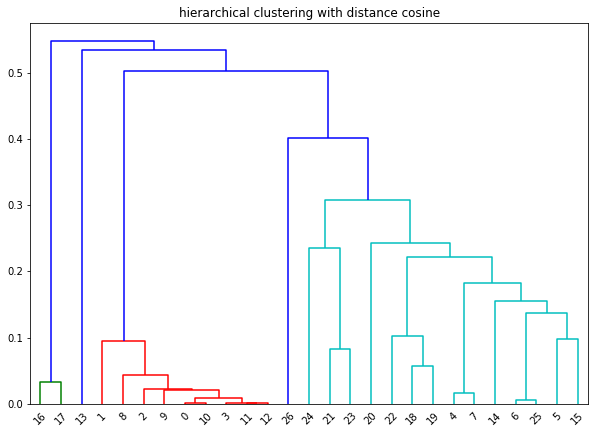

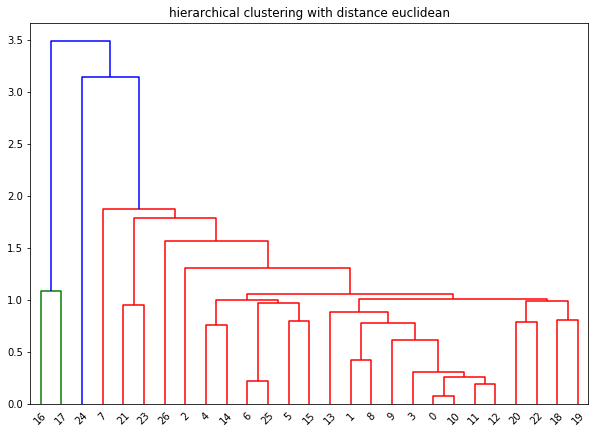

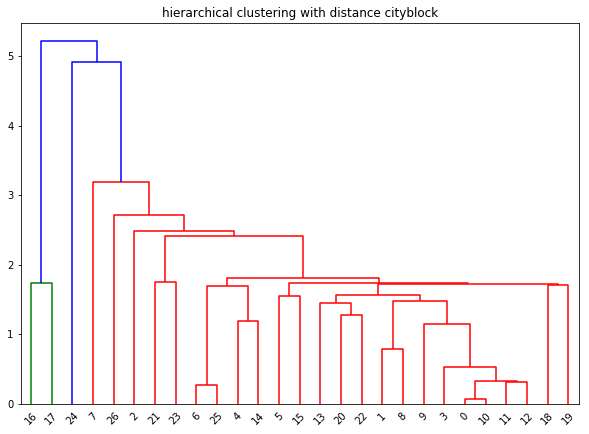

In [105]:
distances = ["cosine", "euclidean", "cityblock"]
for distance in distances:
    linked = linkage(food.drop('Name',axis=1), metric=distance)


    plt.figure(figsize=(10, 7))
    plt.title('hierarchical clustering with distance {}'.format(distance))

    dendrogram(linked,
                orientation='top',
                distance_sort='descending',
                show_leaf_counts=True)
    plt.show()

Changing the agglomeration criterion:

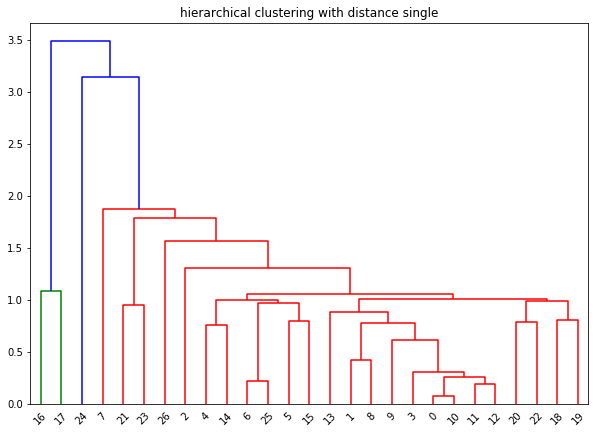

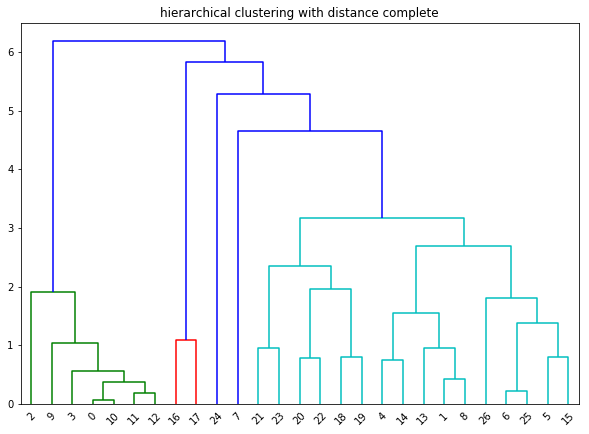

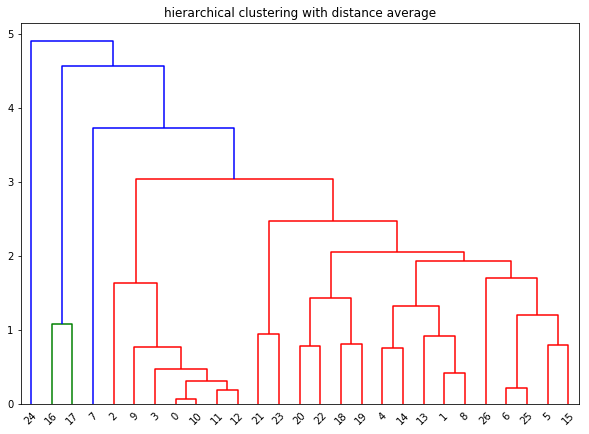

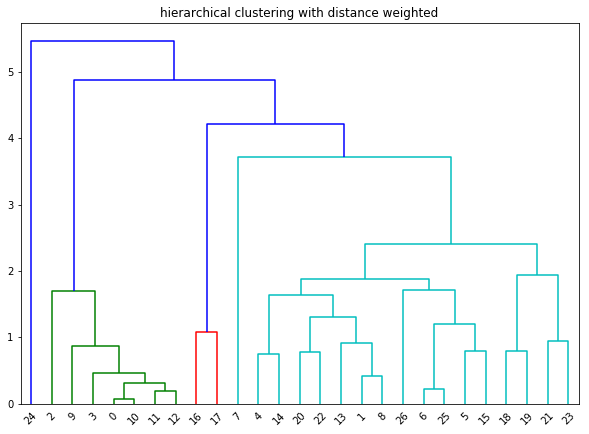

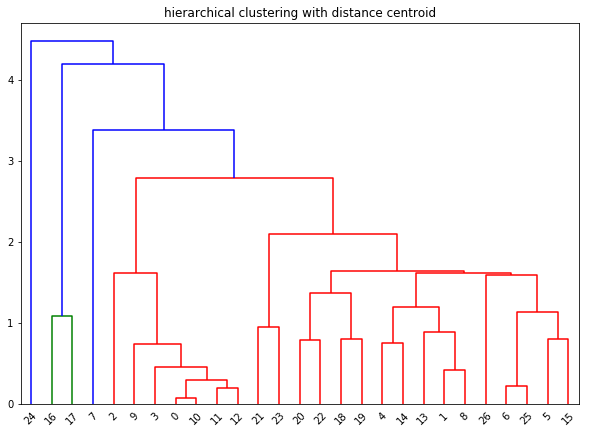

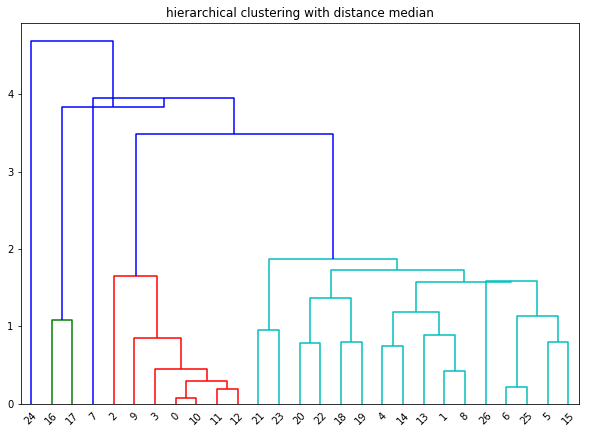

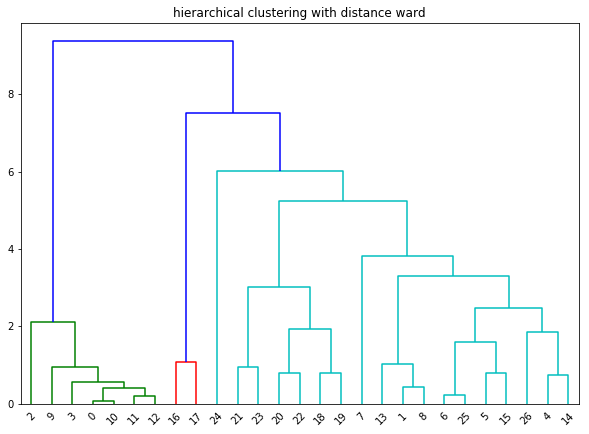

In [106]:
distances = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
for distance in distances:
    linked = linkage(food.drop('Name',axis=1), method=distance)


    plt.figure(figsize=(10, 7))
    plt.title('hierarchical clustering with distance {}'.format(distance))

    dendrogram(linked,
                orientation='top',
                distance_sort='descending',
                show_leaf_counts=True)
    plt.show()

## Question 10

/homes/g18quint/.local/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


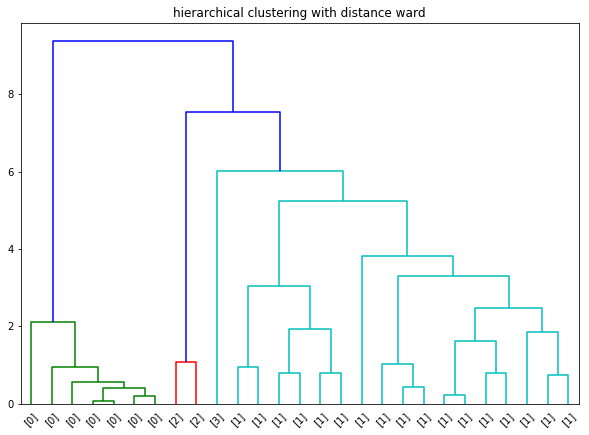

In [107]:
linked = linkage(food.drop('Name',axis=1), method='ward')
tree_cut = cut_tree(linked, n_clusters=4)
plt.figure(figsize=(10, 7))
plt.title('hierarchical clustering with distance {}'.format(distance))

dendrogram(linked,
            orientation='top',
            distance_sort='descending',
           labels = tree_cut,
            show_leaf_counts=True)
plt.show()

In [111]:
food = pd.read_csv('food.csv', sep=';')
food['cluster'] = tree_cut

Calculating statistic measures for each of the four clusters:

In [129]:
food_0 = pd.DataFrame(food.loc[food['cluster']==0])

for key in food_0.drop('Name',axis=1).keys():
    if key !='cluster':
        array=food_0[key].values
        mean = np.average(array)
        std = np.std(array)
        print('average for groupe 0 in parameter {}: {}'.format(key,mean))
        print('std for groupe 0 in parameter {}: {}'.format(key,std))

average for groupe 0 in parameter Energy: 352.85714285714283
std for groupe 0 in parameter Energy: 34.4193822947336
average for groupe 0 in parameter Protein: 18.571428571428573
std for groupe 0 in parameter Protein: 1.5907898179514348
average for groupe 0 in parameter Fat: 30.142857142857142
std for groupe 0 in parameter Fat: 4.120630029101702
average for groupe 0 in parameter Calcium: 8.714285714285714
std for groupe 0 in parameter Calcium: 0.6998542122237652
average for groupe 0 in parameter Iron: 2.414285714285714
std for groupe 0 in parameter Iron: 0.19587584572574415


In [130]:
food_1 = pd.DataFrame(food.loc[food['cluster']==1])

for key in food_1.drop('Name',axis=1).keys():
    if key !='cluster':
        array=food_1[key].values
        mean = np.average(array)
        std = np.std(array)
        print('average for groupe 1 in parameter {}: {}'.format(key,mean))
        print('std for groupe 1 in parameter {}: {}'.format(key,std))

average for groupe 1 in parameter Energy: 166.76470588235293
std for groupe 1 in parameter Energy: 45.92004485005586
average for groupe 1 in parameter Protein: 20.176470588235293
std for groupe 1 in parameter Protein: 3.518610924408984
average for groupe 1 in parameter Fat: 8.352941176470589
std for groupe 1 in parameter Fat: 5.1671038249406465
average for groupe 1 in parameter Calcium: 35.470588235294116
std for groupe 1 in parameter Calcium: 49.52375264582206
average for groupe 1 in parameter Iron: 1.970588235294118
std for groupe 1 in parameter Iron: 1.331856159819756


In [131]:
food_1 = pd.DataFrame(food.loc[food['cluster']==2])

for key in food_1.drop('Name',axis=1).keys():
    if key !='cluster':
        array=food_1[key].values
        mean = np.average(array)
        std = np.std(array)
        print('average for groupe 2 in parameter {}: {}'.format(key,mean))
        print('std for groupe 2 in parameter {}: {}'.format(key,std))

average for groupe 1 in parameter Energy: 57.5
std for groupe 1 in parameter Energy: 12.5
average for groupe 1 in parameter Protein: 9.0
std for groupe 1 in parameter Protein: 2.0
average for groupe 1 in parameter Fat: 1.0
std for groupe 1 in parameter Fat: 0.0
average for groupe 1 in parameter Calcium: 78.0
std for groupe 1 in parameter Calcium: 4.0
average for groupe 1 in parameter Iron: 5.7
std for groupe 1 in parameter Iron: 0.2999999999999998


In [132]:
food_1 = pd.DataFrame(food.loc[food['cluster']==3])

for key in food_1.drop('Name',axis=1).keys():
    if key !='cluster':
        array=food_1[key].values
        mean = np.average(array)
        std = np.std(array)
        print('average for groupe 3 in parameter {}: {}'.format(key,mean))
        print('std for groupe 3 in parameter {}: {}'.format(key,std))

average for groupe 1 in parameter Energy: 180.0
std for groupe 1 in parameter Energy: 0.0
average for groupe 1 in parameter Protein: 22.0
std for groupe 1 in parameter Protein: 0.0
average for groupe 1 in parameter Fat: 9.0
std for groupe 1 in parameter Fat: 0.0
average for groupe 1 in parameter Calcium: 367.0
std for groupe 1 in parameter Calcium: 0.0
average for groupe 1 in parameter Iron: 2.5
std for groupe 1 in parameter Iron: 0.0


Regarding the differences between the four:

In [133]:
food_1 = pd.DataFrame(food.loc[food['cluster']==0])
food_1

,Name,Energy,Protein,Fat,Calcium,Iron,cluster
0,Braised beef,340,20,28,9,2.6,0
2,Roast beef,420,15,39,7,2.0,0
3,Beefsteak,375,19,32,9,2.6,0
9,Roast lamb shoulder,300,18,25,9,2.3,0
10,Smoked ham,340,20,28,9,2.5,0
11,Pork roast,340,19,29,9,2.5,0
12,Pork simmered,355,19,30,9,2.4,0


In [134]:
food_1 = pd.DataFrame(food.loc[food['cluster']==1])
food_1

,Name,Energy,Protein,Fat,Calcium,Iron,cluster
1,Hamburger,245,21,17,9,2.7,1
4,Canned beef,180,22,10,17,3.7,1
5,Broiled chicken,115,20,3,8,1.4,1
6,Canned chicken,170,25,7,12,1.5,1
7,Beef heart,160,26,5,14,5.9,1
8,Roast lamb leg,265,20,20,9,2.6,1
13,Beef tongue,205,18,14,7,2.5,1
14,Veal cutlet,185,23,9,9,2.7,1
15,Baked bluefish,135,22,4,25,0.6,1
18,Canned crabmeat,90,14,2,38,0.8,1


In [135]:
food_1 = pd.DataFrame(food.loc[food['cluster']==2])
food_1

,Name,Energy,Protein,Fat,Calcium,Iron,cluster
16,Raw clams,70,11,1,82,6.0,2
17,Canned clams,45,7,1,74,5.4,2


In [136]:
food_1 = pd.DataFrame(food.loc[food['cluster']==3])
food_1

,Name,Energy,Protein,Fat,Calcium,Iron,cluster
24,Canned sardines,180,22,9,367,2.5,3
